<a href="https://colab.research.google.com/github/oObelix/DataScience/blob/master/Jun_ML_Clusterization_HW_7_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances

with open('sample_data/clustering.pkl', 'rb') as f:
  clustering = pickle.load(f)

X = np.array(clustering['X'])
y = np.array(clustering['Y'])

In [ ]:
# -- ВАШ КОД ТУТ --

km_model = KMeans(n_clusters=4).fit(X)
s_score = silhouette_score(X, km_model.labels_)
print(f'silhouette_score = {s_score}')

silhouette_score = 0.4388619866610211


## Судя по silhouette_score = 0.443, метрика ухудшилась для n_clusters=4 (< 0.452)


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [ ]:
# -- ВАШ КОД ТУТ --

ami = adjusted_mutual_info_score(y, km_model.labels_, average_method='arithmetic')
print(f'ami = {ami}')

ami = 0.5815916539517929


## Судя по ami = 0.583, метрика ухудшилась для n_clusters=4 (< 0.614)


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

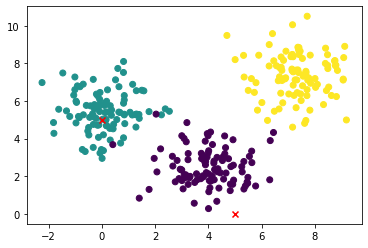

In [ ]:
# -- ВАШ КОД ТУТ --

# Загрузка и визуализация

pd_clustering_hw = pd.read_csv('sample_data/clustering_hw.csv')
pd_clustering_hw.head(10)

plt.scatter(pd_clustering_hw['x1'], pd_clustering_hw['x2'], c=pd_clustering_hw['y'])
plt.scatter([5, 0], [0, 5], c='red', marker='x')
plt.show()


In [ ]:
print(pd_clustering_hw)

           x1        x2  y
0    6.221343  4.968753  2
1    7.360892  8.857455  2
2   -0.108178  4.730723  1
3    3.127358  1.927986  0
4   -0.817259  6.759974  1
..        ...       ... ..
295  0.863590  4.798039  1
296  4.451104  2.183275  0
297  7.530399  8.261081  2
298  0.103995  5.893627  1
299  7.183510  6.842215  2

[300 rows x 3 columns]


In [ ]:
X = np.array(pd_clustering_hw[['x1', 'x2']])
X[:10]

array([[ 6.2213434 ,  4.96875257],
       [ 7.36089211,  8.85745517],
       [-0.1081778 ,  4.73072345],
       [ 3.12735827,  1.92798607],
       [-0.81725933,  6.75997401],
       [-0.45395306,  5.13148343],
       [ 0.18634346,  5.4164213 ],
       [ 0.30266601,  4.5447096 ],
       [ 1.77307347,  5.43644781],
       [-0.201195  ,  6.36651577]])

In [ ]:
y = np.array(pd_clustering_hw['y'])
y[:10]

array([2, 2, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# 1.

# a) При помощи формул локтевого метода находим оптимальное колличество кластеров

metrics = []
MAX_CLUSTERS = 7
for cluster_num in range(1, MAX_CLUSTERS):
    km_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = km_model.cluster_centers_, km_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

cluster_num 1, metric 1105.8973781101083
cluster_num 2, metric 663.5712032768099
cluster_num 3, metric 374.6589714184062
cluster_num 4, metric 348.170527240596
cluster_num 5, metric 323.0909288942994
cluster_num 6, metric 300.10388486033423
best cluster num: 3


best cluster num: 3


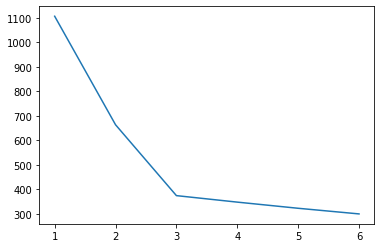

In [ ]:
# Визуализирую локоть для более наглядногографического вывода о колличестве кластеров

D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

In [ ]:
# b) Воспользуюсь метрикой AMI (так как мне известны метки y кластеров)

ami_previous = -1

for cluster_num in range(2, 10):
  km_model = KMeans(n_clusters=cluster_num).fit(X)
  ami = adjusted_mutual_info_score(y, km_model.labels_, average_method='arithmetic')
  if ami < ami_previous:
    break
  ami_previous = ami

print('cluster_num %s, ami %.4f' % (cluster_num-1, ami_previous))


cluster_num 3, ami 0.9700


In [ ]:
# 2.

km_model = KMeans(n_clusters=3, random_state=99).fit(X)

In [ ]:
km_model.cluster_centers_

array([[0.11472588, 5.38816844],
       [7.32891777, 7.36774138],
       [4.04379735, 2.45403144]])

In [ ]:
# 3. К какому кластеру принадлежит точка 𝑥=(5,8) ? к какому кластеру принадлежит точка 𝑥=(0,5) ?

def max_diist(arr, dot):
  max_dist = 0
  for do in arr:
    tmp_dist = euclidean(do, dot)
    if tmp_dist > max_dist:
      max_dist = tmp_dist
    # print(do, tmp_dist, dot)
  return max_dist


# cluster_0_radius = euclidean_distances(np.array(X)[y==0], 
#                                        [list(km_model.cluster_centers_[0])]).max()
# cluster_1_radius = euclidean_distances(np.array(X)[y==1], 
#                                        [list(km_model.cluster_centers_[1])]).max()
# cluster_2_radius = euclidean_distances(np.array(X)[y==2], 
#                                        [list(km_model.cluster_centers_[2])]).max()



X0 = np.array(pd_clustering_hw[pd_clustering_hw['y']==0][['x1', 'x2']])
X1 = np.array(pd_clustering_hw[pd_clustering_hw['y']==1][['x1', 'x2']])
X2 = np.array(pd_clustering_hw[pd_clustering_hw['y']==2][['x1', 'x2']])

# !!! Центры кластеров никак не связаны с метками. 
# Подбираем по минимуму расстояния к своему кластеру. !!!
# Можно данный процесс было автоматизировать, но я не стал мудрить
# и для данного колличества кластеров подобрал их центры вручную.
cluster_0_radius = max_diist(X1, km_model.cluster_centers_[0])
cluster_1_radius = max_diist(X2, km_model.cluster_centers_[1])
cluster_2_radius = max_diist(X0, km_model.cluster_centers_[2])

print('cluster_0 radius = %.3f' % cluster_0_radius)
print('cluster_1 radius = %.3f' % cluster_1_radius)
print('cluster_2 radius = %.3f' % cluster_2_radius)

rads = [cluster_0_radius, cluster_1_radius, cluster_2_radius]
dots = [[5, 8], [0, 5]]

for i, center in enumerate(km_model.cluster_centers_):
  for dot in dots:
    dist = euclidean(dot, center)
    print(dot, 'center: ', center, 'dist:', '{:.3f}'.format(dist), 
          'radius:', '{:.3f}'.format(rads[i]), 'Точка принадлежит кластеру:', dist <= rads[i])

cluster_0 radius = 2.845
cluster_1 radius = 3.377
cluster_2 radius = 3.832
[5, 8] center:  [0.11472588 5.38816844] dist: 5.540 radius: 2.845 Точка принадлежит кластеру: False
[0, 5] center:  [0.11472588 5.38816844] dist: 0.405 radius: 2.845 Точка принадлежит кластеру: True
[5, 8] center:  [7.32891777 7.36774138] dist: 2.413 radius: 3.377 Точка принадлежит кластеру: True
[0, 5] center:  [7.32891777 7.36774138] dist: 7.702 radius: 3.377 Точка принадлежит кластеру: False
[5, 8] center:  [4.04379735 2.45403144] dist: 5.628 radius: 3.832 Точка принадлежит кластеру: False
[0, 5] center:  [4.04379735 2.45403144] dist: 4.779 radius: 3.832 Точка принадлежит кластеру: False


## Судя по расстояниям до центов и спредам кластеров, точка [0, 5] принадлежит кластеру с центром в:  [0.11472588 5.38816844], а точка [5, 8] - [7.32891777 7.36774138]. 

In [ ]:
# 4.

ami = adjusted_mutual_info_score(y, km_model.labels_, average_method='arithmetic')
print(f'ami = {ami}')

ami = 0.9700074953683859


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)